In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Pada tahapan dibawah ini, kita memisahkan variabel yang bersifat numerik dan kategorik. Variabel numerik merupakan variabel yang memiliki tipe data **int** atau **float**, sedangkan variabel kategorik memiliki tipe data **object**

In [ ]:
#differentiation between numeric and categoric variable
numeric = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categoric = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

Unique Values in Categoric Features before Feature Splitting



In [ ]:
print('Unique Values in Training Data')
for i in categoric:
  print(i, "=", train[i].nunique())

Unique Values in Training Data
PassengerId = 8693
HomePlanet = 3
CryoSleep = 2
Cabin = 6560
Destination = 3
VIP = 2
Name = 8473


In [ ]:
print('Unique Values in Testing Data')
for i in categoric:
  print(i, "=", test[i].nunique())

Unique Values in Testing Data
PassengerId = 4277
HomePlanet = 3
CryoSleep = 2
Cabin = 3265
Destination = 3
VIP = 2
Name = 4176


##**Exploratory Part**##

Pada langkah ini kita membuat kolom baru, yang mencakup sebagai berikut:

- Memecah kolom nama menjadi nama depan dan nama belakang
- Memisahkan kolom ID Passenger menjadi representasi Group dan Person
- Memecah fitur kabin menjadi Cabin1, Cabin2, dan Cabin3

Harapannya, dengan melakukan langkah *Feature Splitting* ini, jumlah unique value dari tiap kolom dapat dikurangi

In [ ]:
df = [train, test]

for i in df:
  i[['Group', 'Person']] = i['PassengerId'].str.split("_", expand = True)
  i[['FirstName', 'LastName']] = i['Name'].str.split(" ", expand = True)
  i[['Cabin1', 'Cabin2', 'Cabin3']] = i['Cabin'].str.split("/", expand = True)
  i.drop(['PassengerId', 'Cabin', 'Name'], axis = 1, inplace = True)

In [ ]:
categoric = ['Group', 'Person', 'FirstName', 'LastName',
             'HomePlanet', 'CryoSleep', 'Cabin1', 'Cabin2', 'Cabin3',
             'Destination', 'VIP']

Pada langkah ini dilakukan checkpointing untuk menyimpan hasil *feature splitting* dalam bentuk csv sehingga dapat digunakan untuk preprocessing lanjutan nantinya

In [ ]:
train.to_csv('traim_preprocessed.csv')
test.to_csv('test_preprocessed.csv')

Unique Values in Categoric Features after Feature Splitting

Pada tahapan di bawah ini, dapat diamati bahwa jumlah nilai unik dari setiap fitur berkurang secara signifikan setelah *Feature Splitting*

In [ ]:
print('Unique Values in Training Data')
for i in categoric:
  print(i, "=", train[i].nunique())

Unique Values in Training Data
Group = 6217
Person = 8
FirstName = 2706
LastName = 2217
HomePlanet = 3
CryoSleep = 2
Cabin1 = 8
Cabin2 = 1817
Cabin3 = 2
Destination = 3
VIP = 2


In [ ]:
print('Unique Values in Testing Data')
for i in categoric:
  print(i, "=", test[i].nunique())

Unique Values in Testing Data
Group = 3063
Person = 8
FirstName = 2130
LastName = 1725
HomePlanet = 3
CryoSleep = 2
Cabin1 = 8
Cabin2 = 1505
Cabin3 = 2
Destination = 3
VIP = 2


##**Bar Chart**##

Bar Chart digunakan untuk menggambarkan korelasi antara variabel kategorik terhadap variabel kategorik lainnya. Selain itu, bar chart juga dapat digunakan untuk melakukan visualisasi distribusi suatu variabel kategorik

Text(0.5, 1.0, 'Distribution of Target Variable')

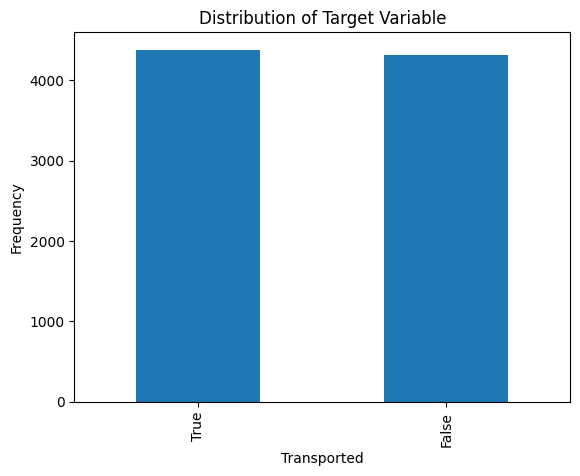

In [ ]:
train['Transported'].value_counts().plot(kind='bar')
plt.xlabel('Transported')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')

<Axes: title={'center': 'Distribution of Home Planet Relative to the Transported'}>

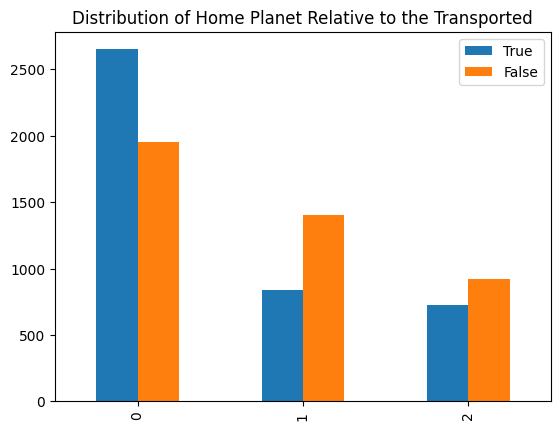

In [ ]:
x = train['Transported'].value_counts().index

y1, y2, y3 = [], [], []
for i in train['Transported'].unique():
  y1.append(train[train['Transported']==i]['HomePlanet'].value_counts().values[0])
  y2.append(train[train['Transported']==i]['HomePlanet'].value_counts().values[1])
  y3.append(train[train['Transported']==i]['HomePlanet'].value_counts().values[2])
df = pd.DataFrame([y1, y2, y3], columns = x)
df.plot(kind='bar',
        stacked=False,
        title='Distribution of Home Planet Relative to the Transported')

<Axes: title={'center': 'Distribution of Cryosleep Relative to the Transported'}>

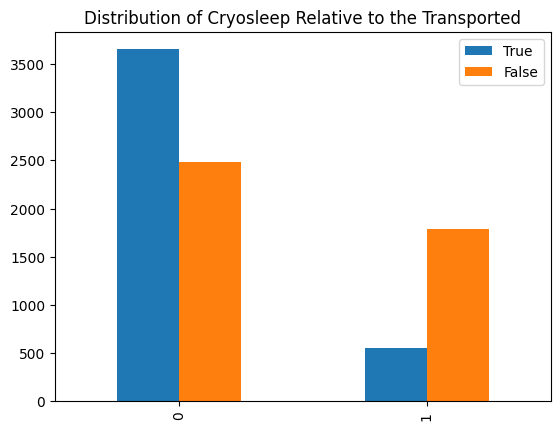

In [ ]:
x = train['Transported'].value_counts().index

y1, y2 = [], []
for i in train['Transported'].unique():
  y1.append(train[train['Transported']==i]['CryoSleep'].value_counts().values[0])
  y2.append(train[train['Transported']==i]['CryoSleep'].value_counts().values[1])
df = pd.DataFrame([y1, y2], columns = x)
df.plot(kind='bar',
        stacked=False,
        title='Distribution of Cryosleep Relative to the Transported')

<Axes: title={'center': 'Distribution of Cabin3 Relative to the Transported'}>

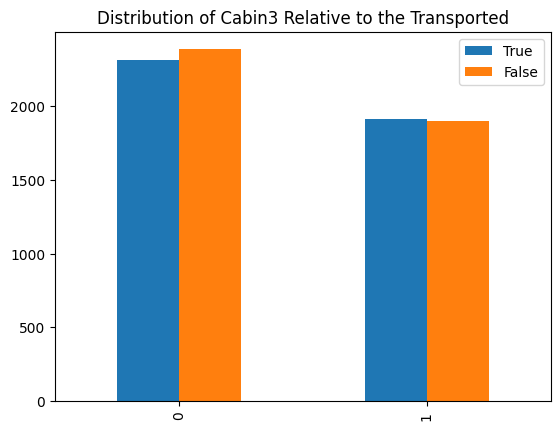

In [ ]:
x = train['Transported'].value_counts().index

y1, y2= [], []
for i in train['Transported'].unique():
  y1.append(train[train['Transported']==i]['Cabin3'].value_counts().values[0])
  y2.append(train[train['Transported']==i]['Cabin3'].value_counts().values[1])
df = pd.DataFrame([y1, y2], columns = x)
df.plot(kind='bar',
        stacked=False,
        title='Distribution of Cabin3 Relative to the Transported')

<Axes: title={'center': 'Distribution of Destination Relative to the Transported'}>

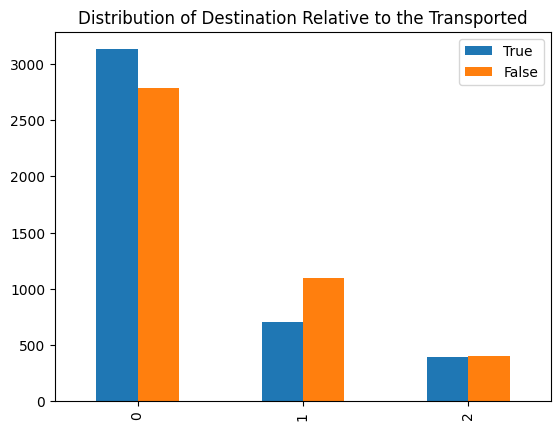

In [ ]:
x = train['Transported'].value_counts().index

y1, y2, y3 = [], [], []
for i in train['Transported'].unique():
  y1.append(train[train['Transported']==i]['Destination'].value_counts().values[0])
  y2.append(train[train['Transported']==i]['Destination'].value_counts().values[1])
  y3.append(train[train['Transported']==i]['Destination'].value_counts().values[2])
df = pd.DataFrame([y1, y2, y3], columns = x)
df.plot(kind='bar',
        stacked=False,
        title='Distribution of Destination Relative to the Transported')

<Axes: title={'center': 'Distribution of VIP Relative to the Transported'}>

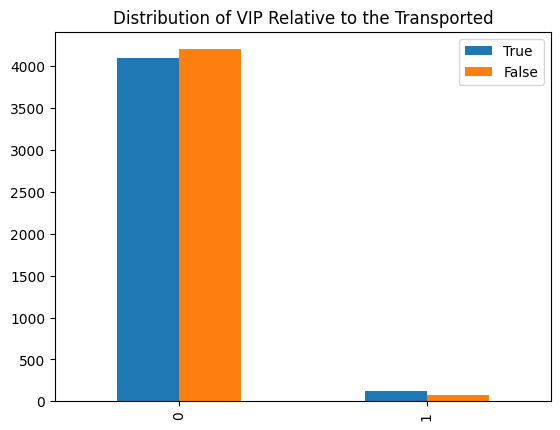

In [ ]:
x = train['Transported'].value_counts().index

y1, y2= [], []
for i in train['Transported'].unique():
  y1.append(train[train['Transported']==i]['VIP'].value_counts().values[0])
  y2.append(train[train['Transported']==i]['VIP'].value_counts().values[1])
df = pd.DataFrame([y1, y2], columns = x)
df.plot(kind='bar',
        stacked=False,
        title='Distribution of VIP Relative to the Transported')

##**Boxplot**##

Boxplot digunakan untuk mengetahui distribusi variabel numerik dan mengetahui apakah suatu variabel mengandung outlier atau tidak

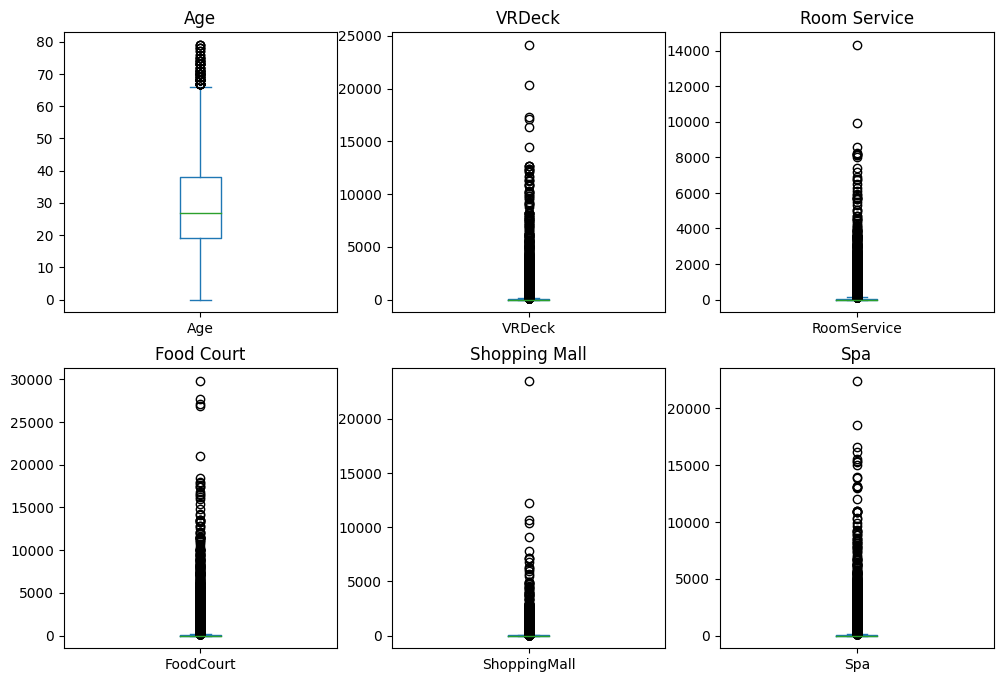

In [ ]:
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
train['Age'].plot(kind='box')
plt.title('Age')

plt.subplot(2,3,2)
train['VRDeck'].plot(kind='box')
plt.title('VRDeck')

plt.subplot(2,3,3)
train['RoomService'].plot(kind='box')
plt.title('Room Service')

plt.subplot(2,3,4)
train['FoodCourt'].plot(kind='box')
plt.title('Food Court')

plt.subplot(2,3,5)
train['ShoppingMall'].plot(kind='box')
plt.title('Shopping Mall')

plt.subplot(2,3,6)
train['Spa'].plot(kind='box')
plt.title('Spa')

plt.show()

##**Scatter Plot**##

Scatter plot digunakan untuk mengetahui korelasi antara dua variabel numerik, apakah kenaikan nilai pada suatu variabel numerik mempengaruhi kenaikan variabel numerik lainnya atau tidak

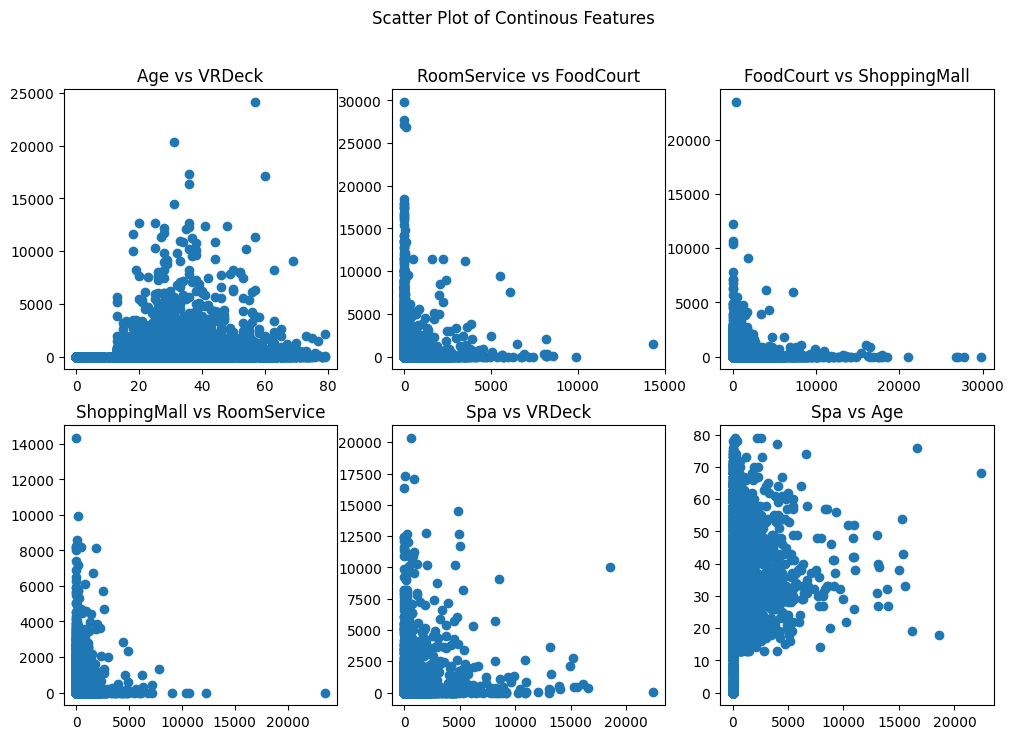

In [ ]:
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.title('Age vs VRDeck')
plt.scatter(train['Age'], train['VRDeck'])

plt.subplot(2,3,2)
plt.title('RoomService vs FoodCourt')
plt.scatter(train['RoomService'], train['FoodCourt'])

plt.subplot(2,3,3)
plt.title('FoodCourt vs ShoppingMall')
plt.scatter(train['FoodCourt'], train['ShoppingMall'])

plt.subplot(2,3,4)
plt.title('ShoppingMall vs RoomService')
plt.scatter(train['ShoppingMall'], train['RoomService'])

plt.subplot(2,3,5)
plt.title('Spa vs VRDeck')
plt.scatter(train['Spa'], train['VRDeck'])

plt.subplot(2,3,6)
plt.title('Spa vs Age')
plt.scatter(train['Spa'], train['Age'])

plt.suptitle('Scatter Plot of Continous Features')
plt.show()

##**Correlation Map**##

Correlation Map digunakan untuk mengetahui korelasi dari sekumpulan variabel numerik sekaligus

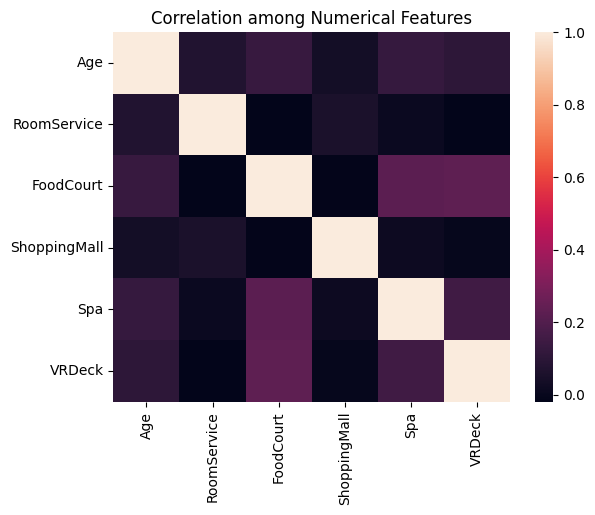

In [ ]:
data = train[[i for i in numeric]]
hm = sns.heatmap(data.corr())
plt.title('Correlation among Numerical Features')
plt.show()

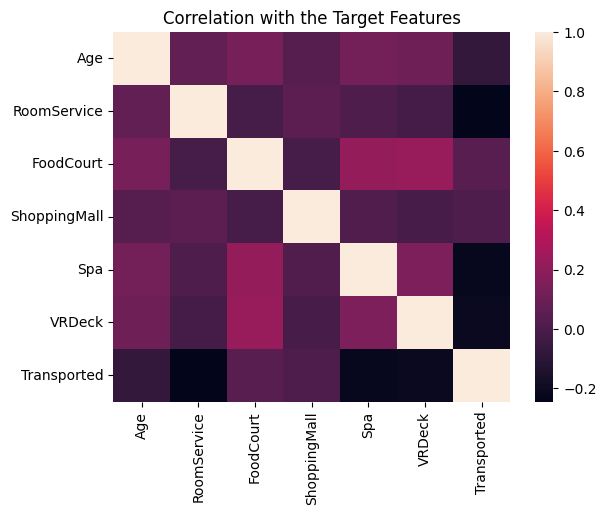

In [ ]:
train['Transported'].astype(int)
target = numeric
target.append('Transported')
data = train[[i for i in target]]
hm = sns.heatmap(data.corr())
plt.title('Correlation with the Target Features')
plt.show()



```
# This is formatted as code
```

##**Kernel Density Estimation**##

Kernel Density Estimator digunakan untuk mengetahui distribusi variabel numerik

<ipython-input-101-a349e7fe266c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Facilities'], kde='True', bins=30)


<Axes: xlabel='Facilities', ylabel='Density'>

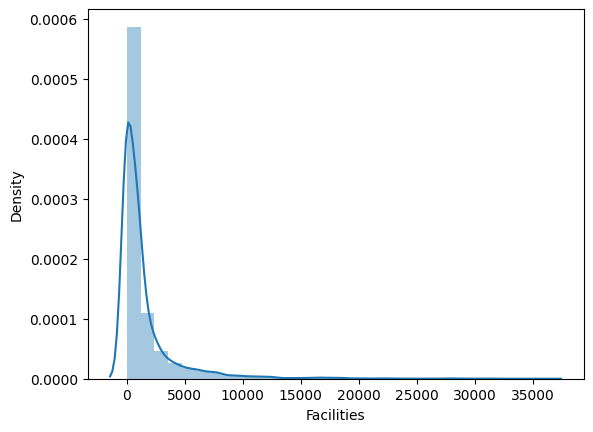

In [ ]:
train['Facilities'] = train['RoomService'] + train['FoodCourt']+ train['ShoppingMall'] + train['Spa'] + train['VRDeck']

sns.distplot(train['Facilities'], kde='True', bins=30)

##**Statistical Test**##

**Pearson Correlation**

In [ ]:
train.dropna(inplace = True)

In [ ]:
from scipy.stats import pearsonr

target = train['Transported']

for i in numeric:
  corr, _ = pearsonr(train[i], target)
  print('Correlation between ', i,' and Target: ', corr)

Correlation between  Age  and Target:  -0.082552876909702
Correlation between  RoomService  and Target:  -0.2472907818370824
Correlation between  FoodCourt  and Target:  0.055024650480644144
Correlation between  ShoppingMall  and Target:  0.011601728883922621
Correlation between  Spa  and Target:  -0.21985426392033444
Correlation between  VRDeck  and Target:  -0.20794964666038346
Correlation between  Transported  and Target:  1.0


**Chi-Square Test**

In [ ]:
from scipy.stats import chi2_contingency

contigency_pct = pd.crosstab(train['CryoSleep'], train['Transported'], normalize='index')
stat, p, dof, expected = chi2_contingency(contigency_pct)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [ ]:
from scipy.stats import chi2_contingency

contigency_pct = pd.crosstab(train['Destination'], train['Transported'], normalize='index')
stat, p, dof, expected = chi2_contingency(contigency_pct)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9739249973107077
Independent (H0 holds true)


In [ ]:
from scipy.stats import chi2_contingency

contigency_pct = pd.crosstab(train['VIP'], train['Transported'], normalize='index')
stat, p, dof, expected = chi2_contingency(contigency_pct)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [ ]:
contigency_pct = pd.crosstab(train['HomePlanet'], train['Transported'], normalize='index')
stat, p, dof, expected = chi2_contingency(contigency_pct)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9454593020908846
Independent (H0 holds true)


In [ ]:
contigency_pct = pd.crosstab(train['FirstName'], train['Transported'], normalize='index')
stat, p, dof, expected = chi2_contingency(contigency_pct)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [ ]:
contigency_pct = pd.crosstab(train['LastName'], train['Transported'], normalize='index')
stat, p, dof, expected = chi2_contingency(contigency_pct)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [ ]:
contigency_pct = pd.crosstab(train['Cabin1'], train['Transported'], normalize='index')
stat, p, dof, expected = chi2_contingency(contigency_pct)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9995983247593843
Independent (H0 holds true)


In [ ]:
contigency_pct = pd.crosstab(train['Cabin2'], train['Transported'], normalize='index')
stat, p, dof, expected = chi2_contingency(contigency_pct)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [ ]:
contigency_pct = pd.crosstab(train['Cabin3'], train['Transported'], normalize='index')
stat, p, dof, expected = chi2_contingency(contigency_pct)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)
